# Import Libraries

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load the data, and keep tweets that are either positive or negative; i.e. discard “neutral” tweets.

In [ ]:
from datasets import load_dataset

ds = load_dataset("sentiment140", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

sentiment140.py:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/498 [00:00<?, ? examples/s]

In [ ]:
train_df = ds['train'].to_pandas()
test_df = ds['test'].to_pandas()


In [ ]:
(train_df.head())

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli,0,NO_QUERY


In [ ]:
(test_df.head())

,text,date,user,sentiment,query
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,Mon May 11 03:17:40 UTC 2009,tpryan,4,kindle2
1,Reading my kindle2... Love it... Lee childs i...,Mon May 11 03:18:03 UTC 2009,vcu451,4,kindle2
2,"Ok, first assesment of the #kindle2 ...it fuck...",Mon May 11 03:18:54 UTC 2009,chadfu,4,kindle2
3,@kenburbary You'll love your Kindle2. I've had...,Mon May 11 03:19:04 UTC 2009,SIX15,4,kindle2
4,@mikefish Fair enough. But i have the Kindle2...,Mon May 11 03:21:41 UTC 2009,yamarama,4,kindle2


In [ ]:
train_df = train_df.sample(frac=0.3, random_state=42)
test_df = test_df.sample(frac=0.3, random_state=42)

In [ ]:
train_df

,text,date,user,sentiment,query
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,0,NO_QUERY
750,"@misstoriblack cool , i have no tweet apps fo...",Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,0,NO_QUERY
766711,@TiannaChaos i know just family drama. its la...,Tue Jun 23 13:40:11 PDT 2009,sammydearr,0,NO_QUERY
285055,School email won't open and I have geography ...,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,0,NO_QUERY
705995,upper airways problem,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,0,NO_QUERY
...,...,...,...,...,...
1112173,@StrollingOn it will happen. just mention you ...,Sat May 30 09:05:17 PDT 2009,TivoliCouture,4,NO_QUERY
393796,"i miss the sun!!! it's raining again, fuck of...",Sat Jun 06 09:23:50 PDT 2009,szonyi,0,NO_QUERY
1135433,mission acomplished! I haven't eaten like that...,Sat May 30 17:28:05 PDT 2009,soundguyg,4,NO_QUERY
793702,I should be in Berlin right now enjoying 4 day...,Thu Jun 25 07:25:12 PDT 2009,StoatsJackson,0,NO_QUERY


In [ ]:
train_df = train_df[(train_df['sentiment'] == 0) | (train_df['sentiment'] == 4)]
test_df = test_df[(test_df['sentiment'] == 0) | (test_df['sentiment'] == 4)]

#  2. Performthe necessary text preprocessing on the text of the tweets.


In [ ]:
lemmatizer = WordNetLemmatizer()

# Train Data
train_df['text'] = train_df['text'].str.lower()  # Convert all text to lowercase
train_df['text'] = train_df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x))  # Remove URLs
train_df['text'] = train_df['text'].apply(lambda x: re.sub(r'@\w+|#\w+', '', x))  # Remove mentions (@) and hashtags (#)
train_df['text'] = train_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # Remove punctuation
train_df['text'] = train_df['text'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
train_df['text'] = train_df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stopwords.words('english')]))  # Remove stopwords (common words like 'the', 'and', etc.)
train_df['text'] = train_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))  # Lemmatize words (convert words to their base form)

# Test Data
test_df['text'] = test_df['text'].str.lower()  # Convert all text to lowercase
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x))  # Remove URLs
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'@\w+|#\w+', '', x))  # Remove mentions (@) and hashtags (#)
test_df['text'] = test_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # Remove punctuation
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
test_df['text'] = test_df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stopwords.words('english')]))  # Remove stopwords
test_df['text'] = test_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))  # Lemmatize words


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer  # Importing Tokenizer for text processing
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Importing pad_sequences for padding sequences
import numpy as np  # Importing numpy for numerical operations

tokenizer = Tokenizer(num_words=10000)  # Initialize the tokenizer to consider only the top 10,000 words
tokenizer.fit_on_texts(train_df['text'])  # Fit the tokenizer on the training text to build the vocabulary

train_sequences = tokenizer.texts_to_sequences(train_df['text'])  # Convert the training texts into sequences of integers
test_sequences = tokenizer.texts_to_sequences(test_df['text'])  # Convert the test texts into sequences of integers

max_sequence_length = 100  # Set the maximum length of sequences (to ensure uniform sequence lengths)
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)  # Pad the training sequences to a fixed length of 100
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)  # Pad the test sequences to a fixed length of 100

# Labels for sentiment (0 and 4)
y_train = np.where(train_df['sentiment'] == 4, 1, 0)  # Convert sentiment labels: Positive (4) = 1, Negative (0) = 0 for training data
y_test = np.where(test_df['sentiment'] == 4, 1, 0)  # Convert sentiment labels: Positive (4) = 1, Negative (0) = 0 for test data


#  3. Build two models that classify tweets using word embeddings and long short-term  memory(LSTM)suchthat:

## Model 1

In [ ]:
from tensorflow.keras.models import Sequential  # Importing Sequential model to stack layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Importing necessary layers for the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Importing callbacks for training

vocab_size = 10000  # Define the size of the vocabulary (top 10,000 words)
embedding_dim = 100  # Define the dimension of the word embeddings (100-dimensional vectors)
max_sequence_length = 100  # Define the maximum length of input sequences (100 tokens)
lstm_units = 128  # Define the number of units in the LSTM layer
dropout_rate = 0.5  # Define the dropout rate for regularization (50% dropout) # Dropout for Input-to-Hidden Connections
recurrent_dropout_rate = 0.2  # Define the recurrent dropout rate (20% dropout for the LSTM's internal connections) #Dropout for Hidden-to-Hidden Connections

model = Sequential()  # Initialize a Sequential model to stack layers

# Embedding layer: Converts input tokens (word indices) into dense vectors of fixed size (100 dimensions)
model.add(Embedding(input_dim=vocab_size,  # Size of the vocabulary
                    output_dim=embedding_dim,  # Dimension of the embedding vectors
                    input_length=max_sequence_length,  # Length of the input sequences
                    trainable=True))  # Set to True to allow the embeddings to be updated during training

# LSTM layer: A Recurrent Neural Network layer that learns patterns in sequential data
model.add(LSTM(units=lstm_units,  # Number of LSTM units (cells) in the layer
               return_sequences=False,  # Set to False as we don't need the output for each time step
               dropout=dropout_rate,  # Apply dropout regularization to the input connections
               recurrent_dropout=recurrent_dropout_rate))  # Apply dropout regularization to the recurrent connections


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.add(Dropout(rate=dropout_rate))  # Add a Dropout layer to regularize the model and prevent overfitting

model.add(Dense(units=64, activation='relu'))  # Add a fully connected (Dense) layer with 64 units and ReLU activation function

model.add(Dropout(rate=dropout_rate))  # Add another Dropout layer to regularize the model further

model.add(Dense(units=1, activation='sigmoid'))  # Add a final output layer with 1 unit (for binary classification) and sigmoid activation function

model.compile(optimizer='adam',  # Use Adam optimizer for training
              loss='binary_crossentropy',  # Binary cross-entropy loss function for binary classification
              metrics=['accuracy'])  # Track accuracy as the performance metric

# EarlyStopping callback to stop training if the validation loss doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=3,  # Stop after 3 epochs without improvement
                               restore_best_weights=True)  # Restore the model weights from the best epoch

# ModelCheckpoint callback to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_model.keras',  # Save the best model to a file
                                    monitor='val_loss',  # Monitor the validation loss
                                    save_best_only=True,  # Save only the best model
                                    verbose=1)  # Show a message when saving the model

model.summary()  # Display the model architecture (layer details, output shapes, etc.)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,  # Training data (X_train) and labels (y_train)
    validation_split=0.2,  # Reserve 20% of the training data for validation during training
    epochs=10,  # Train for 10 epochs
    batch_size=32,  # Use a batch size of 32 for training
    callbacks=[early_stopping, model_checkpoint],  # Use EarlyStopping and ModelCheckpoint callbacks
    verbose=1  # Show progress of training for each epoch (1 means showing detailed logs)
)

model.load_weights('best_model.keras')  # Load the weights of the best model (based on validation loss)

# Evaluate the model on the test set (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)  # Get the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print the test loss and accuracy


Epoch 1/10
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7391 - loss: 0.5220
Epoch 1: val_loss improved from inf to 0.46376, saving model to best_model.keras
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 1217s 101ms/step - accuracy: 0.7391 - loss: 0.5220 - val_accuracy: 0.7803 - val_loss: 0.4638
Epoch 2/10
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7847 - loss: 0.4604
Epoch 2: val_loss improved from 0.46376 to 0.45373, saving model to best_model.keras
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 1215s 101ms/step - accuracy: 0.7847 - loss: 0.4604 - val_accuracy: 0.7852 - val_loss: 0.4537
Epoch 3/10
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7938 - loss: 0.4448
Epoch 3: val_loss improved from 0.45373 to 0.45157, saving model to best_model.keras
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 1222s 102ms/step - accuracy: 0.7938 - loss: 0.4448 - val_accuracy: 0.7881 - val_loss: 0.4516
Epoch 4/10
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7985 - loss: 0.4353
Epoch 4

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Import necessary metrics

# Make predictions on the test set and convert probabilities to binary labels (0 or 1)
predictions = (model.predict(X_test) > 0.5).astype(int)  # Apply threshold of 0.5 to classify as 0 or 1

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy (percentage of correct predictions)

f1 = f1_score(y_test, predictions)  # Calculate F1 Score (harmonic mean of precision and recall)

precision_macro = precision_score(y_test, predictions, average='macro')  # Calculate Precision (Macro average)
recall_macro = recall_score(y_test, predictions, average='macro')  # Calculate Recall (Macro average)
f1_macro = f1_score(y_test, predictions, average='macro')  # Calculate F1 Score (Macro average)

# Print the results for all metrics
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places
print(f"F1 Score: {f1:.4f}")  # Print F1 Score with 4 decimal places
print(f"Precision (Macro): {precision_macro:.4f}")  # Print Precision (Macro) with 4 decimal places
print(f"Recall (Macro): {recall_macro:.4f}")  # Print Recall (Macro) with 4 decimal places
print(f"F1 Score (Macro): {f1_macro:.4f}")  # Print F1 Score (Macro) with 4 decimal places


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Accuracy: 0.8020
F1 Score: 0.8148
Precision (Macro): 0.8047
Recall (Macro): 0.8134
F1 Score (Macro): 0.8010


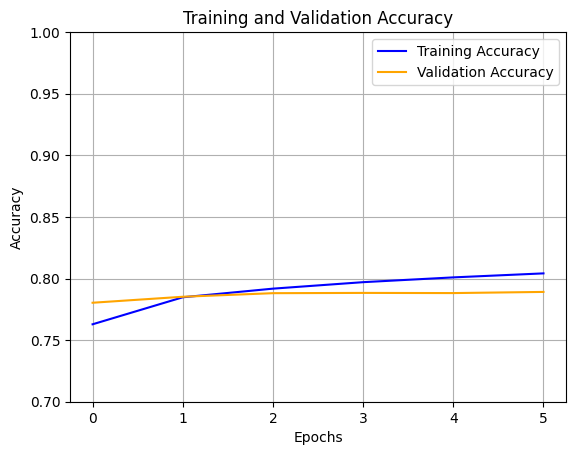

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.ylim(0.7, 1.0)

plt.grid(True)
plt.show()

## Model 2

In [ ]:
import numpy as np  # Import numpy for array manipulation and numerical computations
from gensim.models import KeyedVectors  # Import KeyedVectors for working with pre-trained word vectors
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer for text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences for padding token sequences
from tensorflow.keras.models import Sequential  # Import Sequential model for building neural networks
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Import layers for embedding, LSTM, dense layers, and dropout
from sklearn.metrics import accuracy_score, f1_score  # Import metrics for evaluating model performance
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical labels

# Load pre-trained Word2Vec model (Google News dataset, 300-dimensional word vectors)
word2vec = api('word2vec-google-news-300')  # Load the pre-trained word2vec model from gensim API


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
train_texts = train_df['text'].tolist()  # Convert the training texts column to a list
test_texts = test_df['text'].tolist()  # Convert the test texts column to a list
train_labels = train_df['sentiment'].tolist()  # Convert the training sentiment labels to a list
test_labels = test_df['sentiment'].tolist()  # Convert the test sentiment labels to a list

# Label encoding to convert labels (e.g., 'positive' and 'negative') into integers
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)  # Fit and transform the train labels
test_labels = label_encoder.transform(test_labels)  # Transform the test labels based on the train label encoding

# Parameters for text tokenization and sequence padding
max_vocab_size = 10000  # Maximum number of words in the vocabulary
max_sequence_length = 100  # Maximum length of the tokenized sequences

# Tokenizer to convert text into a sequence of integers
tokenizer = Tokenizer(num_words=max_vocab_size)  # Initialize tokenizer with a vocabulary size limit
tokenizer.fit_on_texts(train_texts)  # Fit the tokenizer on the training texts
train_sequences = tokenizer.texts_to_sequences(train_texts)  # Convert training texts into integer sequences
test_sequences = tokenizer.texts_to_sequences(test_texts)  # Convert test texts into integer sequences

# Pad sequences to ensure all sequences have the same length
x_train = pad_sequences(train_sequences, maxlen=max_sequence_length)  # Pad train sequences to the same length
x_test = pad_sequences(test_sequences, maxlen=max_sequence_length)  # Pad test sequences to the same length

# Set embedding dimension and initialize embedding matrix
embedding_dim = 300  # Word embeddings will be 300-dimensional (Google News Word2Vec)
word_index = tokenizer.word_index  # Get the word index (dictionary of word to integer mapping)
num_words = min(max_vocab_size, len(word_index) + 1)  # Limit the number of words to max_vocab_size
embedding_matrix = np.zeros((num_words, embedding_dim))  # Initialize embedding matrix with zeros

# Populate embedding matrix with pre-trained Word2Vec vectors for each word
for word, i in word_index.items():
    if i >= max_vocab_size:  # Skip words that are beyond the vocabulary size limit
        continue
    if word in word2vec:  # If the word exists in the pre-trained Word2Vec model
        embedding_matrix[i] = word2vec[word]  # Set the embedding for that word

# Build the neural network model
model = Sequential([
    Embedding(input_dim=num_words,  # Input dimension is the size of vocabulary
              output_dim=embedding_dim,  # Output dimension is the embedding size
              weights=[embedding_matrix],  # Initialize with the pre-trained Word2Vec embeddings
              input_length=max_sequence_length,  # Input length is the padded sequence length
              trainable=False),  # Keep the embedding layer non-trainable (using pre-trained embeddings)
    LSTM(128, return_sequences=False),  # LSTM layer with 128 units (captures long-term dependencies)
    Dropout(0.5),  # Dropout layer to prevent overfitting (drop 50% of units during training)
    Dense(1, activation='sigmoid')  # Dense output layer with sigmoid activation for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss during training
    patience=3,  # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the model weights from the best epoch (when the validation loss was lowest)
)


model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='binary_crossentropy',  # Use binary crossentropy as the loss function for binary classification
              metrics=['accuracy'])  # Track accuracy as a metric during training


In [ ]:
history = model.fit(
    x_train, np.array(train_labels),  # Input training data (features and labels)
    validation_data=(x_test, np.array(test_labels)),  # Validation data to evaluate the model during training
    batch_size=batch_size,  # Number of samples per gradient update
    epochs=epochs,  # Number of times to iterate over the entire training data
    verbose=1,  # Verbosity level: 1 displays progress bar, 2 displays one line per epoch
    callbacks=[early_stopping]  # Early stopping callback to stop training if validation loss doesn't improve
)


Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - accuracy: 0.7371 - loss: 0.5246 - val_accuracy: 0.8119 - val_loss: 0.4387
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.7758 - loss: 0.4698 - val_accuracy: 0.7921 - val_loss: 0.4183
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.7820 - loss: 0.4564 - val_accuracy: 0.7822 - val_loss: 0.4579
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.7890 - loss: 0.4458 - val_accuracy: 0.7921 - val_loss: 0.4569
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.7955 - loss: 0.4357 - val_accuracy: 0.8218 - val_loss: 0.4581


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate predictions from the model (probabilities converted to 0 or 1)
# (model.predict(x_test) gives probabilities, > 0.5 converts them to 1 for positive class or 0 for negative)
predictions = (model.predict(x_test) > 0.5).astype(int)

# Calculate accuracy score: Proportion of correct predictions
accuracy = accuracy_score(test_labels, predictions)

# Calculate F1 score: Harmonic mean of precision and recall (useful for imbalanced datasets)
f1 = f1_score(test_labels, predictions)

# Calculate precision with macro averaging: Precision for each class, then averaged
precision_macro = precision_score(test_labels, predictions, average='macro')

# Calculate recall with macro averaging: Recall for each class, then averaged
recall_macro = recall_score(test_labels, predictions, average='macro')

# Calculate F1 score with macro averaging: F1 score for each class, then averaged
f1_macro = f1_score(test_labels, predictions, average='macro')

# Print the evaluation metrics with 4 decimal places
print(f"Accuracy: {accuracy:.4f}")  # Prints the accuracy of the model
print(f"F1 Score: {f1:.4f}")        # Prints the overall F1 score
print(f"Precision (Macro): {precision_macro:.4f}")  # Prints the macro-average precision
print(f"Recall (Macro): {recall_macro:.4f}")        # Prints the macro-average recall
print(f"F1 Score (Macro): {f1_macro:.4f}")          # Prints the macro-average F1 score


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Accuracy: 0.7921
F1 Score: 0.8174
Precision (Macro): 0.7863
Recall (Macro): 0.7912
F1 Score (Macro): 0.7880


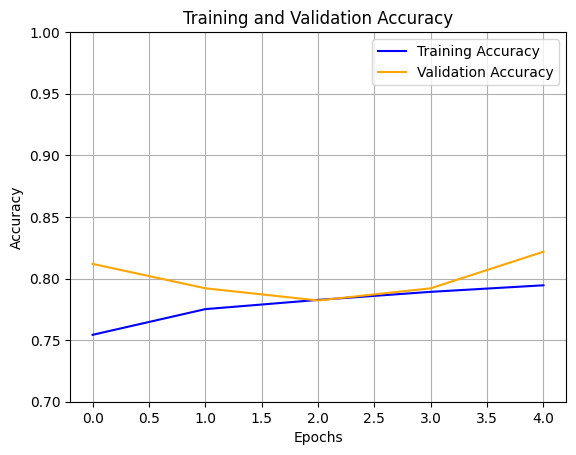

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.ylim(0.7, 1.0)

plt.grid(True)
plt.show()

####  5 Implementthefunctions “predict” and “LSTM_forward” from scratch such that:

In [ ]:
# Global variables to store the extracted weights
EMBEDDING_MATRIX = None
LSTM_WEIGHTS = None
LSTM_BIASES = None
DENSE_WEIGHTS = None
DENSE_BIAS = None

The code effectively mimics an LSTM's forward pass manually by performing matrix multiplications and applying the corresponding activation functions. The custom LSTM_forward function allows for a detailed step-by-step simulation of LSTM operations.

In [ ]:
# Function to extract the model weights
def extract_model_weights(model):
    # Using global variables to store the weights
    global EMBEDDING_MATRIX, LSTM_WEIGHTS, LSTM_BIASES, DENSE_WEIGHTS, DENSE_BIAS

    # Extract weights from the embedding layer (first layer of the model)
    embedding_layer = model.layers[0]
    EMBEDDING_MATRIX = embedding_layer.get_weights()[0]  # Store embedding matrix weights

    # Extract weights from the LSTM layer (second layer of the model)
    lstm_layer = model.layers[1]
    lstm_kernel, lstm_recurrent_kernel, lstm_bias = lstm_layer.get_weights()

    # Store LSTM weights in a dictionary for easy access
    LSTM_WEIGHTS = {
        'kernel': lstm_kernel,  # Weights for the input-to-hidden transformation
        'recurrent_kernel': lstm_recurrent_kernel,  # Weights for the hidden-to-hidden transformation
        'bias': lstm_bias  # Bias for the LSTM layer
    }

    # Extract weights from the Dense layer (final layer of the model)
    dense_layer = model.layers[-1]
    DENSE_WEIGHTS, DENSE_BIAS = dense_layer.get_weights()  # Store Dense layer weights and bias

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# LSTM forward pass function
def LSTM_forward(x, h_prev=None, c_prev=None):
    # Extract weights for LSTM gates and biases
    W_ih = LSTM_WEIGHTS['kernel']  # Input-to-hidden weights
    W_hh = LSTM_WEIGHTS['recurrent_kernel']  # Hidden-to-hidden weights
    b = LSTM_WEIGHTS['bias']  # Bias for the LSTM layer

    # Initialize hidden and cell states if not provided
    hidden_size = W_hh.shape[0]  # The size of the hidden state (number of neurons)
    if h_prev is None:
        h_prev = np.zeros(hidden_size)  # Initialize previous hidden state as zeros if not provided
    if c_prev is None:
        c_prev = np.zeros(hidden_size)  # Initialize previous cell state as zeros if not provided

# Masking @#@
    # Determine which timesteps have valid data (non-zero input)
    valid_timesteps = np.any(x != 0, axis=1)  # Check for non-zero input at each timestep
    x_valid = x[valid_timesteps]  # Filter valid timesteps

    # Initialize hidden state (h) and cell state (c)
    h = h_prev
    c = c_prev

    # Iterate through each valid timestep in the sequence
    for xt in x_valid:
        # Compute the gates' input values by performing a linear transformation
        gates_input = np.dot(xt, W_ih) + np.dot(h, W_hh) + b  # Linear transformation of the input and previous hidden state

        # Split the gates input into individual gates
        i_gate = sigmoid(gates_input[:hidden_size])  # Input gate (determines how much new information to store)
        f_gate = sigmoid(gates_input[hidden_size:2*hidden_size])  # Forget gate (determines what to forget)
        c_tilde = tanh(gates_input[2*hidden_size:3*hidden_size])  # Cell candidate (new candidate values for cell state)
        o_gate = sigmoid(gates_input[3*hidden_size:])  # Output gate (determines the output of the LSTM)

        # Update the cell state (c) and hidden state (h)
        c = f_gate * c + i_gate * c_tilde  # Update the cell state (long-term memory)
        h = o_gate * tanh(c)  # Update the hidden state (short-term memory)

    # Apply the Dense layer weights and bias to the final hidden state (h) to get the output
    output = sigmoid(np.dot(h, DENSE_WEIGHTS) + DENSE_BIAS)  # Final output layer after applying sigmoid activation

    return output[0]  # Return the final output (first element of the output array)


This function takes a list of text input (X), processes the text into padded sequences of word embeddings, passes each sequence through the manually implemented LSTM (LSTM_forward), and returns the predicted output. The model's weights (including the embedding matrix) are extracted if they haven’t been extracted already.

In [ ]:
def predict(X, model, tokenizer):
    # Check if the model's embedding matrix has been extracted, and extract it if necessary
    if EMBEDDING_MATRIX is None:
        extract_model_weights(model)  # Extract weights from the model if not already done

    # Convert input texts into sequences of integers based on the tokenizer's vocabulary
    sequences = tokenizer.texts_to_sequences(X)

    # Pad the sequences to ensure they all have the same length (100)
    x_padded = pad_sequences(sequences, maxlen=100)

    # Initialize a 3D array to hold the word embeddings for the input sequences
    # Shape: (number of samples, sequence length, embedding dimension)
    x_embedded = np.zeros((x_padded.shape[0], x_padded.shape[1], 300))

    # Loop through each sequence and replace word indices with their corresponding embeddings
    for i, seq in enumerate(x_padded):
        for j, word_idx in enumerate(seq):
            # Only replace with embedding if the word index is within the bounds of the embedding matrix
            if word_idx < EMBEDDING_MATRIX.shape[0]:
                x_embedded[i, j] = EMBEDDING_MATRIX[word_idx]

    # List to store the model's predictions
    predictions = []

    # Iterate over each embedded sequence to pass it through the LSTM
    for example in x_embedded:
        pred = LSTM_forward(example)  # Call the LSTM_forward function to get the prediction
        predictions.append(pred)  # Append the prediction for the current sequence

    # Return the predictions as a NumPy array
    return np.array(predictions)


In [ ]:
def pad_sequences(sequences, maxlen):
    # Initialize a NumPy array filled with zeros.
    # This array will have dimensions (number of sequences, maxlen),
    # where `maxlen` is the desired length for each sequence.
    padded = np.zeros((len(sequences), maxlen), dtype=int)

    # Loop through each sequence in the input list of sequences
    for i, seq in enumerate(sequences):
        # Truncate the sequence to the specified maxlen
        trunc_seq = seq[:maxlen]

        # Fill the corresponding row in the padded array with the truncated sequence
        padded[i, :len(trunc_seq)] = trunc_seq

    # Return the padded array
    return padded


In [ ]:
new_texts = test_df['text'].tolist()[:2]

In [ ]:
predictions = predict(new_texts, model, tokenizer)
print("Texts:", new_texts)
print("Predictions:", predictions)

Texts: ['getting ready test burger receipes weekend bobby flay great receipes try thanks bobby', 'back worked nike one fav word']
Predictions: [0.91767524 0.77281241]


####  6. Test your functions by taking a small sample of the test data and feeding it to your


Key Components:
Memory Tracking (tracemalloc): This is used to measure the memory consumption of the Keras and custom model prediction processes. It helps evaluate how much memory each model implementation requires during inference.

Timing: The time taken by both the Keras and custom models to make predictions is tracked using time.time(). This helps measure the efficiency of both implementations.

Accuracy and Similarity: The accuracy of both models is calculated based on how many predictions match the true labels. The similarity between Keras and custom predictions is also computed to compare how closely the two models' outputs align.

Sample Predictions: The function prints a detailed comparison of sample predictions from both models, including whether the predictions match.

In [ ]:
import numpy as np
import time
import psutil
import tracemalloc
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Global weight variables
# These will store the weights for the embedding matrix, LSTM layers, dense layers, and biases.
EMBEDDING_MATRIX, LSTM_WEIGHTS, DENSE_WEIGHTS, DENSE_BIAS = None, None, None, None

def compare_predictions(model, tokenizer, test_texts, test_labels):
    """
    Compare the predictions made by the Keras model and the custom implementation.
    Measures time, memory usage, and accuracy for both methods.

    Arguments:
    model -- Trained Keras model
    tokenizer -- Tokenizer used to preprocess the test data
    test_texts -- List of text samples for testing
    test_labels -- True binary labels (1 for positive sentiment, 0 for negative sentiment)

    Returns:
    A dictionary containing comparison metrics like time, memory usage, and accuracy.
    """

    # Start memory tracking for Keras model prediction
    tracemalloc.start()

    # Keras Model Prediction
    # Record the start time and memory usage for Keras prediction
    keras_start_time = time.time()
    keras_start_memory = tracemalloc.get_traced_memory()[0]

    # Preprocess test texts by converting them to sequences and padding
    keras_sequences = tokenizer.texts_to_sequences(test_texts)
    keras_x_test = pad_sequences(keras_sequences, maxlen=100)

    # Make predictions using the Keras model
    keras_predictions = model.predict(keras_x_test)
    keras_predictions_binary = (keras_predictions > 0.5).astype(int).flatten()  # Threshold to get binary predictions

    # Record the end time and memory usage for Keras prediction
    keras_end_time = time.time()
    keras_end_memory = tracemalloc.get_traced_memory()[1]

    # Stop and reset memory tracking
    tracemalloc.stop()
    tracemalloc.start()

    # Custom Implementation Prediction
    # Record the start time and memory usage for the custom prediction
    custom_start_time = time.time()
    custom_start_memory = tracemalloc.get_traced_memory()[0]

    # If EMBEDDING_MATRIX is None, extract the weights from the model (i.e., if not already loaded)
    if EMBEDDING_MATRIX is None:
        extract_model_weights(model)

    # Make predictions using the custom implementation of the model
    custom_predictions = predict(test_texts, model, tokenizer)
    custom_predictions_binary = (custom_predictions > 0.5).astype(int).flatten()  # Threshold to get binary predictions

    # Record the end time and memory usage for custom prediction
    custom_end_time = time.time()
    custom_end_memory = tracemalloc.get_traced_memory()[1]

    # Stop memory tracking
    tracemalloc.stop()

    # Ensure label shapes match (flatten labels to match prediction dimensions)
    test_labels = np.array(test_labels).flatten()

    # Compute accuracy for both Keras and custom predictions
    keras_accuracy = np.mean(keras_predictions_binary == test_labels)  # Keras accuracy
    custom_accuracy = np.mean(custom_predictions_binary == test_labels)  # Custom implementation accuracy

    # Compute prediction similarity between Keras and custom predictions
    prediction_similarity = np.mean(keras_predictions_binary == custom_predictions_binary)

    # Return the comparison results as a dictionary
    return {
        'keras_time': keras_end_time - keras_start_time,  # Time taken for Keras model prediction
        'custom_time': custom_end_time - custom_start_time,  # Time taken for custom model prediction
        'keras_memory': keras_end_memory - keras_start_memory,  # Memory used during Keras prediction
        'custom_memory': custom_end_memory - custom_start_memory,  # Memory used during custom prediction
        'keras_accuracy': keras_accuracy,  # Accuracy of Keras model
        'custom_accuracy': custom_accuracy,  # Accuracy of custom model
        'prediction_similarity': prediction_similarity,  # Similarity of predictions between Keras and custom models
        'keras_predictions': keras_predictions_binary,  # Binary predictions from Keras model
        'custom_predictions': custom_predictions_binary  # Binary predictions from custom model
    }

def prepare_test_sample(test_df, sample_size=100):
    """
    Prepares a random sample of test data from the given DataFrame.

    Arguments:
    test_df -- DataFrame containing the test data with 'text' and 'sentiment' columns
    sample_size -- Number of samples to randomly select (default is 100)

    Returns:
    A tuple of (test_texts, test_labels) where:
    - test_texts: List of text samples for prediction
    - test_labels: List of binary labels (1 for positive sentiment, 0 for negative sentiment)
    """
    # Randomly sample the test DataFrame
    sample_df = test_df.sample(n=sample_size, random_state=42)

    # Extract the texts from the sampled data
    test_texts = sample_df['text'].tolist()

    # Convert sentiment labels to binary: 4 -> 1 (positive sentiment), others -> 0 (negative sentiment)
    test_labels = np.where(sample_df['sentiment'].values == 4, 1, 0)

    return test_texts, test_labels

def run_prediction_comparison(model, tokenizer, test_df):
    """
    Run the comparison of Keras and custom model predictions and display the results.

    Arguments:
    model -- Trained Keras model
    tokenizer -- Tokenizer used to preprocess the test data
    test_df -- DataFrame containing the test data with 'text' and 'sentiment' columns
    """
    # Prepare a random test sample
    test_texts, test_labels = prepare_test_sample(test_df)

    # Compare predictions using Keras and custom models
    comparison_results = compare_predictions(model, tokenizer, test_texts, test_labels)

    # Print the comparison results
    print("\n--- Prediction Comparison Results ---")
    print(f"Keras Prediction Time:   {comparison_results['keras_time']:.4f} seconds")
    print(f"Custom Prediction Time:  {comparison_results['custom_time']:.4f} seconds")
    print(f"Keras Memory Usage:      {comparison_results['keras_memory']} bytes")
    print(f"Custom Memory Usage:     {comparison_results['custom_memory']} bytes")
    print(f"Keras Accuracy:          {comparison_results['keras_accuracy']:.4f}")
    print(f"Custom Accuracy:         {comparison_results['custom_accuracy']:.4f}")
    print(f"Prediction Similarity:   {comparison_results['prediction_similarity']:.4f}")

    # Display a comparison of the predictions for each sample
    print("\nSample Predictions Comparison:")
    for i, (keras_pred, custom_pred, true_label, text) in enumerate(zip(
        comparison_results['keras_predictions'],
        comparison_results['custom_predictions'],
        test_labels,
        test_texts
    ), 1):
        print(f"Sample {i}:")
        print(f"  Text:          {text}")
        print(f"  True Label:    {true_label}")
        print(f"  Keras Pred:    {keras_pred}")
        print(f"  Custom Pred:   {custom_pred}")
        print(f"  Prediction Match: {keras_pred == custom_pred}\n")


In [ ]:
run_prediction_comparison(model, tokenizer, test_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

--- Prediction Comparison Results ---
Keras Prediction Time:   0.1293 seconds
Custom Prediction Time:  0.4158 seconds
Keras Memory Usage:      218487 bytes
Custom Memory Usage:     38263850 bytes
Keras Accuracy:          0.7900
Custom Accuracy:         0.7800
Prediction Similarity:   0.9700

Sample Predictions Comparison:
Sample 1:
  Text:          zomg g
  True Label:    1
  Keras Pred:    1
  Custom Pred:   1
  Prediction Match: True

Sample 2:
  Text:          see dave winer scream lack twitter api limitation access throttle
  True Label:    0
  Keras Pred:    0
  Custom Pred:   0
  Prediction Match: True

Sample 3:
  Text:          highly recommend malcolm gladwell
  True Label:    1
  Keras Pred:    1
  Custom Pred:   1
  Prediction Match: True

Sample 4:
  Text:          pissed atampts midcontract upgrade price iphone im going pay something thought
  True Label:    0
  Keras Pred:    0
  Custom Pred:   0
  Prediction Match: True

Sample 5:
 

In [ ]:
def detailed_prediction_comparison(model, tokenizer, test_df):
    # Step 1: Sample Selection
    sample_df = test_df.sample(n=100, random_state=42)  # Randomly select 100 samples from the DataFrame
    test_texts = sample_df['text'].tolist()  # Extract the texts from the sample

    # Ensure EMBEDDING_MATRIX is loaded
    if EMBEDDING_MATRIX is None:
        extract_model_weights(model)  # Extract weights if not already loaded

    # Step 2: Preprocessing - Tokenization and Padding
    keras_sequences = tokenizer.texts_to_sequences(test_texts)  # Convert text to sequences of integers
    keras_x_test = pad_sequences(keras_sequences, maxlen=100)  # Pad sequences to a fixed length of 100

    # Step 3: Keras Model Prediction
    keras_predictions = model.predict(keras_x_test)  # Get predictions from the Keras model

    # Step 4: Custom Implementation Prediction
    custom_predictions = predict(test_texts, model, tokenizer)  # Get predictions from the custom model

    # Step 5: Detailed Comparison Output
    print("Prediction Comparison:")
    print("Index | Keras Prob | Custom Prob | Abs Difference")
    print("-" * 45)

    total_diff = 0  # Initialize variable to track total difference between predictions
    for i in range(len(test_texts)):
        keras_prob = keras_predictions[i][0]  # Get Keras prediction probability (assuming binary output)
        custom_prob = custom_predictions[i]  # Get custom model prediction probability
        diff = abs(keras_prob - custom_prob)  # Calculate absolute difference between predictions
        total_diff += diff  # Accumulate the difference

        # Display the comparison for each sample
        print(f"{i:5d} | {keras_prob:10.4f} | {custom_prob:11.4f} | {diff:13.4f}")

    # Step 6: Calculate Average Absolute Difference
    avg_diff = total_diff / len(test_texts)  # Compute the average difference
    print(f"\nAverage Absolute Difference: {avg_diff:.4f}")

    # Step 7: Correlation between predictions
    correlation = np.corrcoef(keras_predictions.flatten(), custom_predictions.flatten())[0, 1]  # Compute correlation
    print(f"Correlation between predictions: {correlation:.4f}")

    return {
        'avg_diff': avg_diff,  # Return the average absolute difference
        'correlation': correlation  # Return the correlation between predictions
    }


In [ ]:
detailed_prediction_comparison(model, tokenizer, test_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prediction Comparison:
Index | Keras Prob | Custom Prob | Abs Difference
---------------------------------------------
    0 |     0.5065 |      0.5030 |        0.0035
    1 |     0.1859 |      0.1954 |        0.0094
    2 |     0.9476 |      0.9616 |        0.0140
    3 |     0.0895 |      0.0840 |        0.0055
    4 |     0.8280 |      0.8396 |        0.0116
    5 |     0.6117 |      0.6309 |        0.0192
    6 |     0.8163 |      0.8356 |        0.0192
    7 |     0.9261 |      0.9367 |        0.0107
    8 |     0.0081 |      0.0072 |        0.0009
    9 |     0.9118 |      0.9177 |        0.0058
   10 |     0.4943 |      0.5125 |        0.0182
   11 |     0.2273 |      0.2426 |        0.0152
   12 |     0.4848 |      0.5051 |        0.0203
   13 |     0.7403 |      0.7520 |        0.0118
   14 |     0.9268 |      0.9597 |        0.0330
   15 |     0.9518 |      0.9574 |        0.0057
   16 |     0.6450 |      0.6581 |        0.0131
   17 |   

{'avg_diff': 0.012276184972180384, 'correlation': 0.9988889242539901}